In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
# prompt: load real.csv and replace event 4 with 3 and remove Commentary column

import pandas as pd
import numpy as np
# Load the CSV file
df = pd.read_csv('base_train.csv')

# Replace event 4 with 3
df['Event'] = df['Event'].replace(4, 3)

df = df[df['Event'] != 2]

In [3]:
from sklearn.metrics import  accuracy_score,f1_score

In [4]:
# Replace event 4 with 3
df['Event'] = df['Event'].replace(4, 2)

Let's start with #GRU

Epoch 1/65


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5490 - loss: 0.9269 - val_accuracy: 0.7810 - val_loss: 0.5444
Epoch 2/65
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7526 - loss: 0.5986 - val_accuracy: 0.7932 - val_loss: 0.5070
Epoch 3/65
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7660 - loss: 0.5682 - val_accuracy: 0.7948 - val_loss: 0.4939
Epoch 4/65
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7772 - loss: 0.5447 - val_accuracy: 0.8015 - val_loss: 0.4852
Epoch 5/65
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7791 - loss: 0.5359 - val_accuracy: 0.8012 - val_loss: 0.4811
Epoch 6/65
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7884 - loss: 0.5176 - val_accuracy: 0.8040 - val_loss: 0.4763
Epoch 7/65
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7865 - loss: 0.5155 - val_accuracy: 0.8017 - val_loss: 0.4726
Epoch 8/65
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7888 - loss: 0.5152 - val_accuracy: 0.8063 - val_

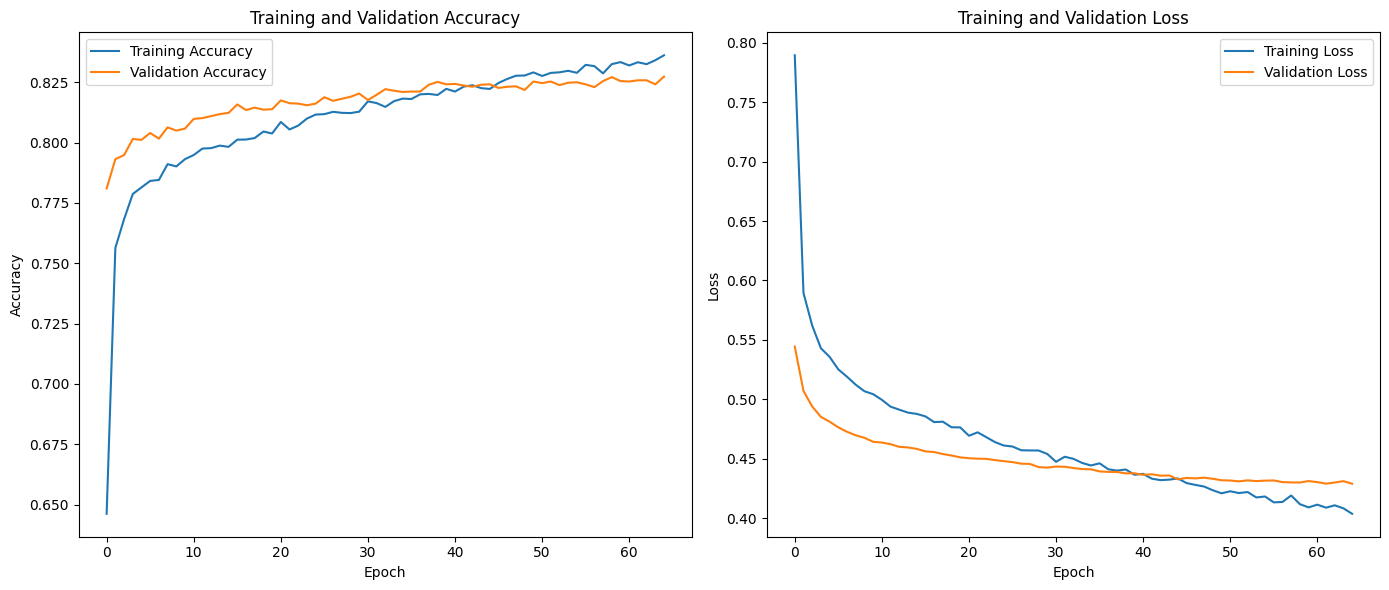

Test Set Accuracy: 0.8303
Test Set Loss: 0.4289
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step
Shape of y_pred: (6000, 3)
Shape of y_test: (6000,)
F1 Score (Weighted): 0.8300068752950721


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# # Load the dataset
# data = pd.read_csv('base_train.csv')  # Replace with the correct path to your file

# Extract the features (x columns) and the target (y column)
X = df.drop(columns=['Event']).values  # Assuming all columns except 'Event' are features
y = df['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for GRU input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.20, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Build the Bidirectional GRU model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Dropout(0.1))
model.add(Bidirectional(GRU(135, activation='tanh'), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(70, activation='tanh'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=65, batch_size=100, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")

# Predict the classes on the test set
y_pred = model.predict(X_test)

# Check the shape of predictions and test set
print(f"Shape of y_pred: {y_pred.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Ensure predicted classes have the same length as y_test
y_pred_classes = np.argmax(y_pred, axis=1)

# Double-check that both arrays have the same number of samples
assert y_pred_classes.shape[0] == y_test.shape[0], "Mismatch in number of samples between y_test and y_pred_classes."

# Calculate F1 score
f1 = f1_score(y_test, y_pred_classes, average='macro')
print(f"F1 Score (Weighted): {f1}")




Epoch 1/80


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4825 - loss: 1.0156 - val_accuracy: 0.7540 - val_loss: 0.6041
Epoch 2/80
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7327 - loss: 0.6405 - val_accuracy: 0.7782 - val_loss: 0.5300
Epoch 3/80
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7612 - loss: 0.5737 - val_accuracy: 0.7900 - val_loss: 0.5075
Epoch 4/80
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7732 - loss: 0.5575 - val_accuracy: 0.7972 - val_loss: 0.4955
Epoch 5/80
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7757 - loss: 0.5443 - val_accuracy: 0.7980 - val_loss: 0.4892
Epoch 6/80
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7850 - loss: 0.5323 - val_accuracy: 0.8022 - val_loss: 0.4845
Epoch 7/80
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7845 - loss: 0.5256 - val_accuracy: 0.8040 - val_loss: 0.4801
Epoch 8/80
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7854 - loss: 0.5210 - val_accuracy: 0.8048 - val_

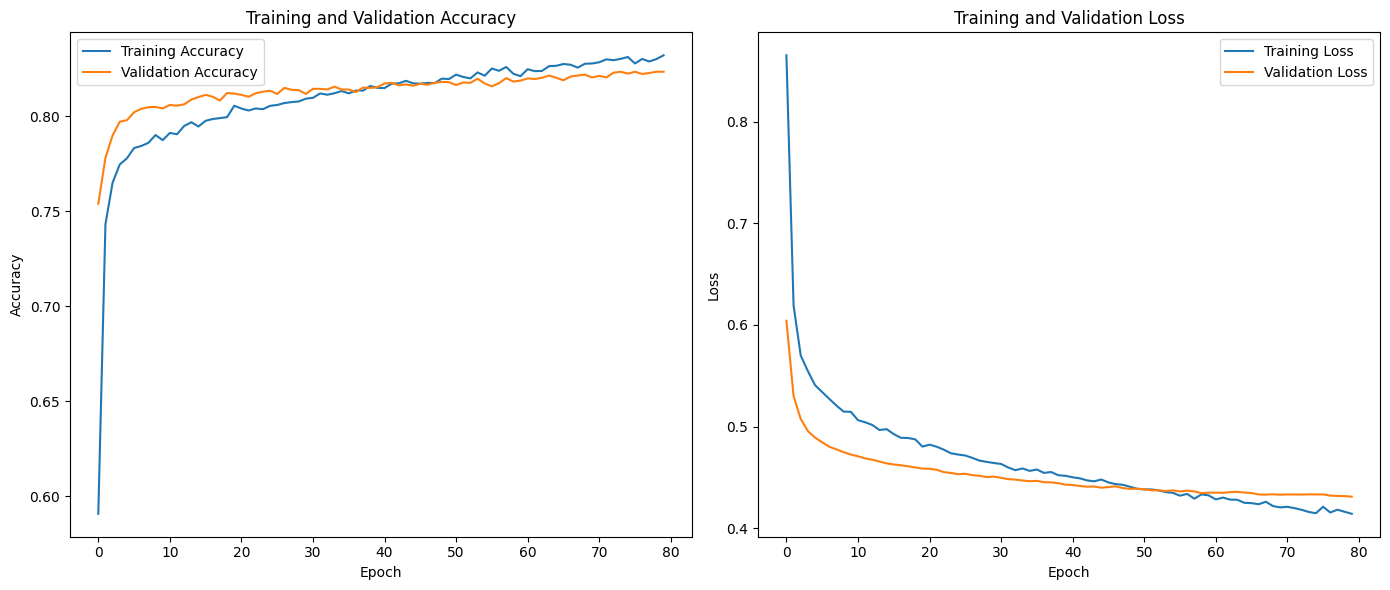

Test Set Accuracy: 0.8263
Test Set Loss: 0.4298
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step
Shape of y_pred: (6000, 3)
Shape of y_test: (6000,)
F1 Score (Weighted): 0.8260326272291048


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# # Load the dataset
# #data = pd.read_csv('base_train.csv')  # Replace with the correct path to your file

# # Extract the features (x columns) and the target (y column)
# X = df.drop(columns=['Event']).values  # Assuming all columns except 'Event' are features
# y = df['Event'].values  # This is the target column

# # Encode the target variable (y) to ensure it's numeric
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# # Scale the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Reshape X for GRU input: [samples, timesteps, features]
# # Assuming each row is a timestep in a sequence
# X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# # Split the dataset into training (70%) and testing (30%) sets
# X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# # Further split the temporary set into validation (50% of the temporary set) and testing (50%)
# X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp)

# Build the GRU model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Dropout(0.1))
model.add(GRU(135, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh', return_sequences=False))
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(70, activation='tanh'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=80, batch_size=100, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")

# Predict the classes on the test set
y_pred = model.predict(X_test)

# Check the shape of predictions and test set
print(f"Shape of y_pred: {y_pred.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Ensure predicted classes have the same length as y_test
y_pred_classes = np.argmax(y_pred, axis=1)

# Double-check that both arrays have the same number of samples
assert y_pred_classes.shape[0] == y_test.shape[0], "Mismatch in number of samples between y_test and y_pred_classes."

# Calculate F1 score
f1 = f1_score(y_test, y_pred_classes, average='macro')
print(f"F1 Score (Weighted): {f1}")




In [17]:
print(f1)

0.8280900272392198


In [5]:
# Extract the features (x columns) and the target (y column)
X = df.drop(columns=['Event']).values  # Assuming all columns except 'Event' are features
y = df['Event'].values  # This is the target column
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [22]:
from sklearn.svm import SVC

In [24]:
# 2. Support Vector Machines (SVM)
svm_classifier = SVC(kernel='linear', random_state=42)  # You can experiment with different kernels
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
f1 = f1_score(y_test, y_pred_svm, average='macro')
print(f"F1 Score (Weighted): {f1}")

SVM Accuracy: 0.8155
F1 Score (Weighted): 0.8143202926118867


In [25]:
# 2. Support Vector Machines (SVM)
svm_classifier = SVC(kernel='rbf', random_state=42)  # You can experiment with different kernels
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
f1 = f1_score(y_test, y_pred_svm, average='macro')
print(f"F1 Score (Weighted): {f1}")

In [1]:

# 1. Logistic Regression
logreg_classifier = LogisticRegression(max_iter=100,random_state=42)
logreg_classifier.fit(X_train, y_train)
y_pred_logreg = logreg_classifier.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)
f1 = f1_score(y_test, y_pred_logreg, average='weighted')
print(f"F1 Score (Weighted): {f1}")

NameError: name 'LogisticRegression' is not defined

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(max_iter=400, tol=1e-4, random_state=42, eta0=1)  # Set learning rate with eta0
sgd_classifier.fit(X_train, y_train)
y_pred_sgd = sgd_classifier.predict(X_test)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print("SGD Classifier Accuracy:", accuracy_sgd)
f1 = f1_score(y_test, y_pred_sgd, average='weighted')
print(f"F1 Score (Weighted): {f1}")

SGD Classifier Accuracy: 0.8078333333333333
F1 Score (Weighted): 0.8077010349292966


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4901 - loss: 1.0112 - val_accuracy: 0.7678 - val_loss: 0.6187
Epoch 2/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7418 - loss: 0.6310 - val_accuracy: 0.7919 - val_loss: 0.5151
Epoch 3/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7682 - loss: 0.5675 - val_accuracy: 0.7983 - val_loss: 0.4927
Epoch 4/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7755 - loss: 0.5448 - val_accuracy: 0.8042 - val_loss: 0.4819
Epoch 5/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7817 - loss: 0.5332 - val_accuracy: 0.8050 - val_loss: 0.4753
Epoch 6/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7881 - loss: 0.5192 - val_accuracy: 0.8085 - val_loss: 0.4702
Epoch 7/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7914 - loss: 0.5160 - val_accuracy: 0.8099 - val_loss: 0.4657
Epoch 8/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7876 - loss: 0.5097 - val_accuracy: 0.8116 - val_

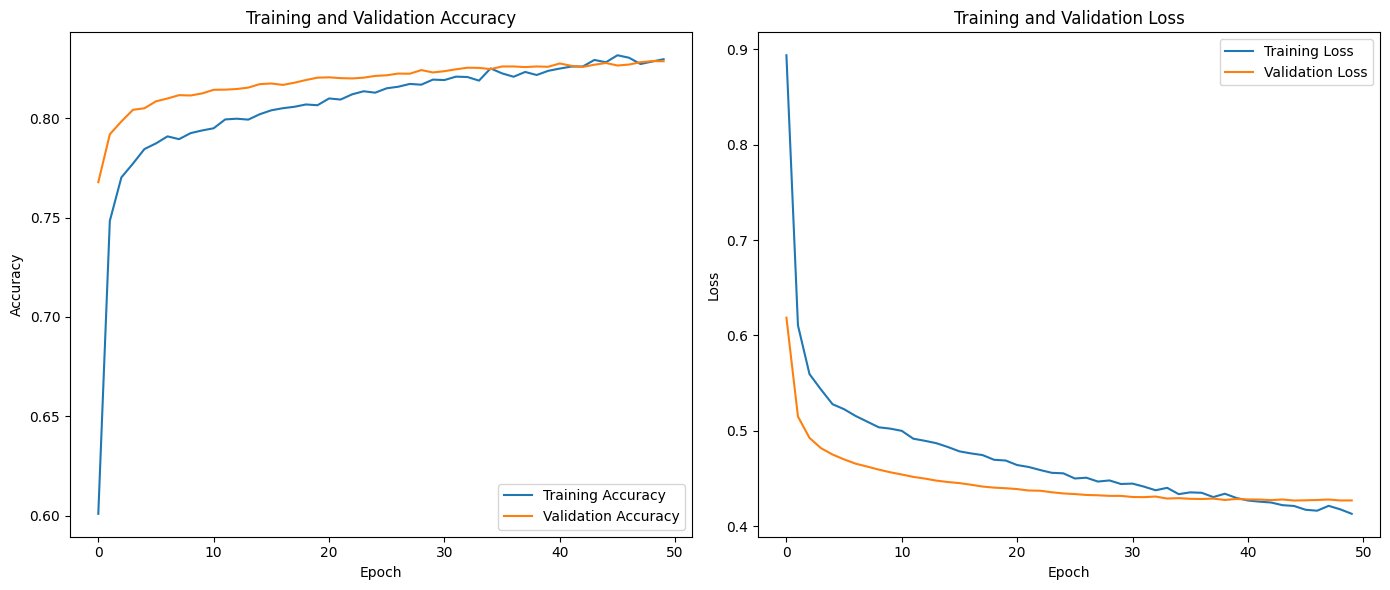

Test Set Accuracy: 0.8348
Test Set Loss: 0.4229
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step
Shape of y_pred: (5400, 3)
Shape of y_test: (5400,)
F1 Score (Weighted): 0.8346182197694226


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Load the dataset
#data = pd.read_csv('base_train.csv')  # Replace with the correct path to your file

# Extract the features (x columns) and the target (y column)
X = df.drop(columns=['Event']).values  # Assuming all columns except 'y' are features
y = df['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for LSTM input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp)

# Build the LSTM model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Dropout(0.1))
model.add(LSTM(135, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'))
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(70, activation='tanh'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(40,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50, batch_size=100, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")
# Predict the classes on the test set
y_pred = model.predict(X_test)

# Check the shape of predictions and test set
print(f"Shape of y_pred: {y_pred.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Ensure predicted classes have the same length as y_test
y_pred_classes = np.argmax(y_pred, axis=1)

# Double-check that both arrays have the same number of samples
assert y_pred_classes.shape[0] == y_test.shape[0], "Mismatch in number of samples between y_test and y_pred_classes."

# Calculate F1 score
f1 = f1_score(y_test, y_pred_classes,average='macro')
print(f"F1 Score (Weighted): {f1}")

# Display classification report



In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming your data is in a DataFrame called 'df' and 'Event' is the target variable
y = df['Event']
X = df.drop('Event', axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=145,max_depth=88,min_samples_split=15, random_state=42)  # You can adjust hyperparameters

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("RandomForest Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score (Weighted): {f1}")

RandomForest Accuracy: 0.8188333333333333
F1 Score (Weighted): 0.8174064013203495


In [11]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier # AdaBoost often uses Decision Trees as base estimators
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming your data is in a DataFrame called 'df' and 'Event' is the target variable
y = df['Event']
X = df.drop('Event', axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a base model (Decision Tree in this case)
base_model = DecisionTreeClassifier(max_depth=100,min_samples_split=80)  # You can adjust the max_depth

# Initialize AdaBoost
adaboost_classifier = AdaBoostClassifier(estimator=base_model, n_estimators=150, random_state=42)  
# You can adjust n_estimators (number of boosting rounds)

# Train the model
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score (Weighted): {f1}")

AdaBoost Accuracy: 0.7963333333333333
F1 Score (Weighted): 0.7959634543187145


Epoch 1/150


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4606 - loss: 1.0444 - val_accuracy: 0.7499 - val_loss: 0.6470
Epoch 2/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6906 - loss: 0.7212 - val_accuracy: 0.7798 - val_loss: 0.5476
Epoch 3/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7214 - loss: 0.6549 - val_accuracy: 0.7917 - val_loss: 0.5180
Epoch 4/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7364 - loss: 0.6227 - val_accuracy: 0.7959 - val_loss: 0.5039
Epoch 5/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7439 - loss: 0.6094 - val_accuracy: 0.7994 - val_loss: 0.4959
Epoch 6/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7457 - loss: 0.6082 - val_accuracy: 0.8016 - val_loss: 0.4912
Epoch 7/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7515 - loss: 0.5945 - val_accuracy: 0.8025 - val_loss: 0.4884
Epoch 8/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7493 - loss: 0.5957 - val_accuracy: 0.8056

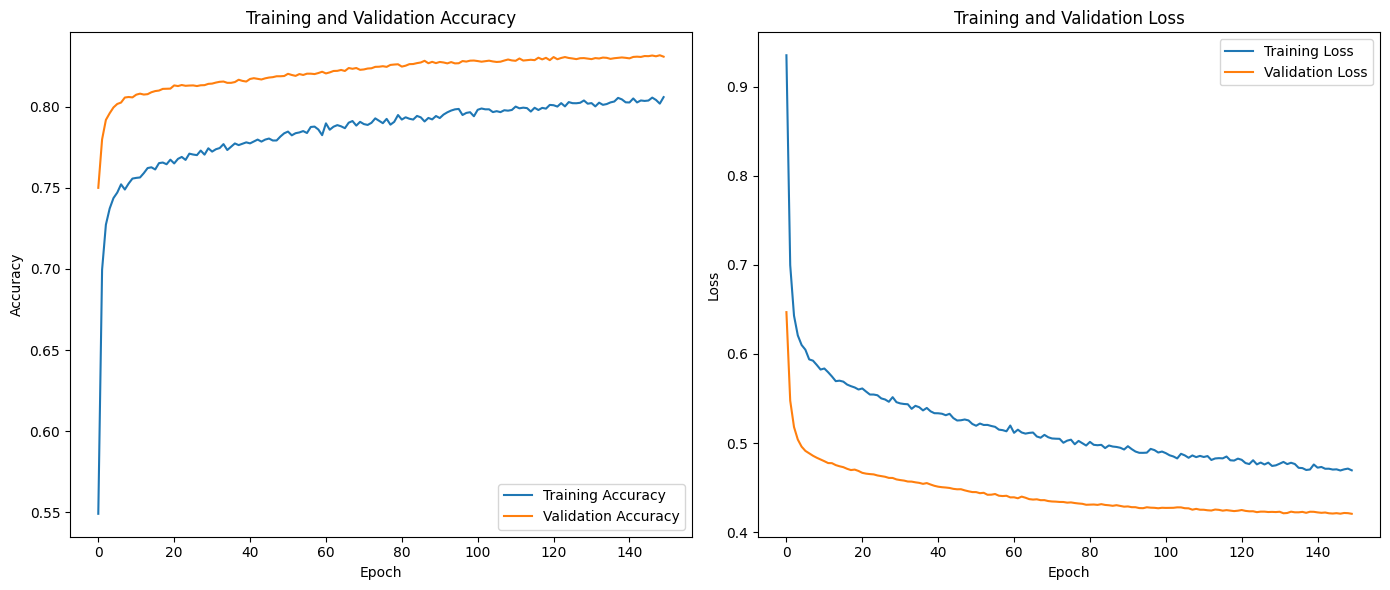

Test Set Accuracy: 0.8324
Test Set Loss: 0.4232


AxisError: axis 1 is out of bounds for array of dimension 1

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Load the dataset
#data = pd.read_csv('base_train.csv')  # Replace with the correct path to your file

# Extract the features (x columns) and the target (y column)
X = df.drop(columns=['Event']).values  # Assuming all columns except 'Event' are features
y = df['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for GRU input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp)

# Build the GRU model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Dropout(0.25))
model.add(GRU(135, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'))
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(70, activation='tanh'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(40, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=150, batch_size=200, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")
# Ensure predicted classes have the same length as y_test
y_pred_classes = np.argmax(y_pred, axis=1)

# Double-check that both arrays have the same number of samples
# assert y_pred_classes.shape[0] == y_test.shape[0], "Mismatch in number of samples between y_test and y_pred_classes."

# Calculate F1 score
f1 = f1_score(y_test, y_pred_classes,average='macro')
print(f"F1 Score (Weighted): {f1}")


In [13]:
f1 = f1_score(y_test, y_pred_classes,average='macro')
print(f"F1 Score (Weighted): {f1}")

F1 Score (Weighted): 0.8346182197694226


Epoch 1/75


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5217 - loss: 0.9528 - val_accuracy: 0.7713 - val_loss: 0.5672
Epoch 2/75
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7328 - loss: 0.6274 - val_accuracy: 0.7941 - val_loss: 0.5064
Epoch 3/75
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7579 - loss: 0.5855 - val_accuracy: 0.8014 - val_loss: 0.4902
Epoch 4/75
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7706 - loss: 0.5547 - val_accuracy: 0.8035 - val_loss: 0.4821
Epoch 5/75
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7766 - loss: 0.5474 - val_accuracy: 0.8043 - val_loss: 0.4768
Epoch 6/75
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7817 - loss: 0.5335 - val_accuracy: 0.8070 - val_loss: 0.4727
Epoch 7/75
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7787 - loss: 0.5350 - val_accuracy: 0.8060 - val_loss: 0.4704
Epoch 8/75
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7807 - loss: 0.5322 - val_accuracy: 0.8081 - val_

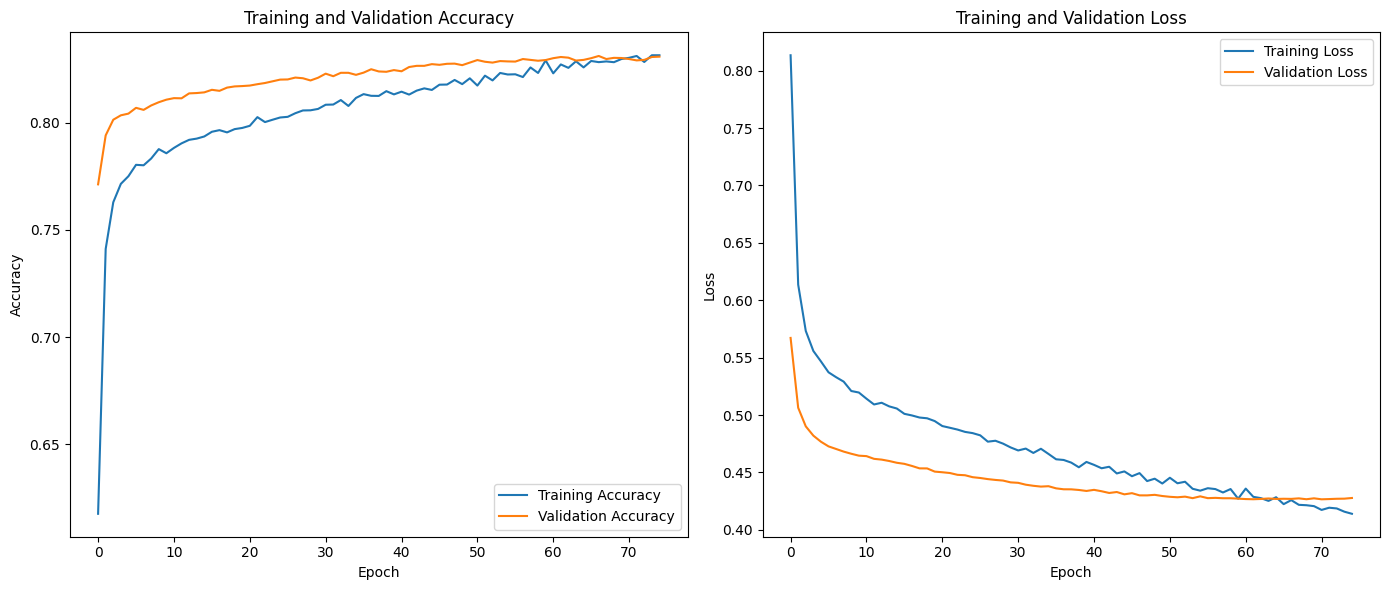

Test Set Accuracy: 0.8370
Test Set Loss: 0.4260


AxisError: axis 1 is out of bounds for array of dimension 1

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Load the dataset
#data = pd.read_csv('base_train.csv')  # Replace with the correct path to your file

# Extract the features (x columns) and the target (y column)
X = df.drop(columns=['Event']).values  # Assuming all columns except 'Event' are features
y = df['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for GRU input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp)

# Build the GRU model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Dropout(0.1))
model.add(GRU(135, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh', return_sequences=False))
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(70, activation='tanh'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(40, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=75, batch_size=100, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")
# Ensure predicted classes have the same length as y_test
y_pred_classes = np.argmax(y_pred, axis=1)

# Double-check that both arrays have the same number of samples
#assert y_pred_classes.shape[0] == y_test.shape[0], "Mismatch in number of samples between y_test and y_pred_classes."

# Calculate F1 score
f1 = f1_score(y_test, y_pred_classes,average='macro')
print(f"F1 Score (Weighted): {f1}")


In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# 3. Decision Tree Classifier
# Decision Tree with several hyperparameters
dt_classifier = DecisionTreeClassifier(
    criterion='gini',          # Use entropy for split quality
    max_depth=60,                 # Limit tree depth
    min_samples_split=15,         # Minimum samples to split
    min_samples_leaf=6,           # Minimum samples at a leaf node
    max_features='sqrt',          # Consider a subset of features
    random_state=42
)
 # You can tweak hyperparameters if needed
dt_classifier.fit(X_train.reshape(X_train.shape[0], -1), y_train)  # Flatten the input for the Decision Tree

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test.reshape(X_test.shape[0], -1))  # Flatten test data

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Calculate F1 score
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')  # 'weighted' accounts for class imbalance
print(f"Decision Tree F1 Score (Weighted): {f1_dt:.4f}")

# # Display classification report
# print("\nDecision Tree Classification Report:\n")
# print(classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_))


Decision Tree Accuracy: 0.745
Decision Tree F1 Score (Weighted): 0.7448


In [61]:
# 2. Support Vector Machines (SVM)
svm_classifier = SVC(kernel='sigmoid', random_state=42)  # You can experiment with different kernels
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
f1 = f1_score(y_test, y_pred_svm, average='macro')
print(f"F1 Score (Weighted): {f1}")

SVM Accuracy: 0.7255
F1 Score (Weighted): 0.7240009203595758
